In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
import PIL

In [7]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(img.shape[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim/long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]

  return img

In [9]:
def imshow(img, title = None):
  if len(img.shape) > 3:
    img = tf.squeeze(img, axis=0)

  plt.imshow(img)

  if title:
    plt.title(title)

In [14]:
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
content_path = 'drive/MyDrive/TIES4911/task5/img-2.jpg'
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

195196/195196 [==============================] - 0s 0us/step


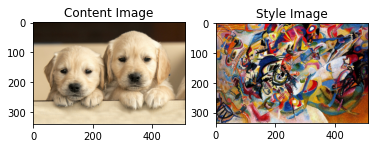

In [10]:
style_img = load_img(style_path)
content_img = load_img(content_path)

plt.subplot(1, 2, 1)
imshow(content_img, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_img, 'Style Image')

In [12]:
print(np.max(style_img))

1.0


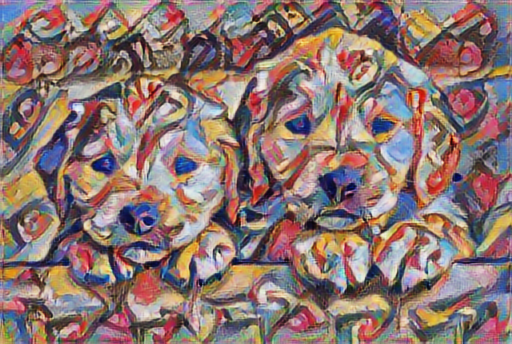

In [15]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_img = hub_model(tf.constant(content_img), tf.constant(style_img))[0]
tensor_to_image(stylized_img)